## EDA on Text

### I. Introduction

The purpose of this notebook is to udnerstand the main structure of the text data: what are the main topics, reccurent words, without performing machine learning per say. It will give us an idea of the text content and give us direction for the sentiment analysis and topic modelling


### II. Preparing the dataframe

In [1]:
import pandas as pd
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import wikipedia

In [2]:
df=pd.read_csv('jrecontentclean.csv')
df

,Unnamed: 0,Unnamed: 0.1,date,guest,duration,text
0,0,0,2020-06-03,Krystal & Saagar,NaN,"hey friends, how you doing this episode, the p..."
1,1,1,2020-06-02,Reggie Watts,2:46:32,"hello, friends, welcome to the show this episo..."
2,2,2,2020-05-29,Jesus Trejo,2:52:47,"pillow friends, welcome to the show this episo..."
3,3,3,2020-05-28,Jordan Jonas,2:22:39,"hello, friends, welcome to the show this episo..."
4,4,4,2020-05-27,wittman/JRE MMA Show with Justin Gaethje &amp...,2:58:39,"oh hi, friends welcome to the show this absurd..."
...,...,...,...,...,...,...
1051,1092,1092,2014-09-15,Big Jay Oakerson,2:55:24,"""he keeps getting. burma is hit this. why? i t..."
1052,1093,1093,2014-09-11,Tim Burnett,2:58:43,"baby jesus pogo stick , easy fashion square, ,..."
1053,1094,1094,2014-09-10,Joe DeRosa,2:50:28,"boom, and here we are, ladies and gentlemen, h..."
1054,1095,1095,2014-09-09,Mike Dolce,NaN,"hey everybody here, this , thing is a no bulls..."


In [3]:
df=df.drop(['Unnamed: 0'], axis=1)
df=df.drop(['Unnamed: 0.1'], axis=1)

df.head()
df.shape

(1056, 4)

In [4]:
df.dropna(subset=['duration'], inplace=True)

In [5]:
df.shape

(994, 4)

### III. Analysing the count vector matrix

In [6]:
add_stop_words = ['like', 'im','guy','hi','ha','kind','want', 'man','good','great','sort','sort of','oh','probably','real',
                  'lot','of','lot of','kind of','doing','way','come','saying','maybe','better','stuff','use','yes',
                  'ok','mean','did','going', 'know', 'make', 'day','gotta', 'let', 'need','doe', 'theyre',
                  'just', 'dont', 'thats', 'right', 'people','youre', 'got','thing','thing ','look','yes ','didnt ','actually ',
                  'say','does','really', 'gonna', 'time', 'think', 'yeah','ive','year', 'said', ' way',]
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [7]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.index
data_dtm

,aa,aaa,aaah,aachen,aakriti,aaliyahs,aamir,aan,aar,aargh,...,zusak,zuyder,zuzu,zv,zy,zygmunt,zygotes,zyklon,zyobites,zyuganov
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = data_dtm.transpose()
data.head()

,1,2,3,4,5,6,7,8,9,10,...,1044,1045,1046,1048,1049,1050,1051,1052,1053,1055
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aakriti,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.to_csv('datatransposed.csv')

In [10]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{1: [('like', 237),
  ('know', 92),
  ('people', 76),
  ('just', 75),
  ('thats', 61),
  ('think', 52),
  ('right', 50),
  ('dont', 36),
  ('youre', 29),
  ('yeah', 28),
  ('theres', 26),
  ('want', 26),
  ('im', 24),
  ('thing', 24),
  ('way', 23),
  ('man', 23),
  ('got', 22),
  ('good', 20),
  ('guy', 20),
  ('gonna', 20),
  ('really', 19),
  ('did', 19),
  ('things', 18),
  ('time', 17),
  ('going', 17),
  ('say', 17),
  ('look', 17),
  ('lot', 16),
  ('feel', 16),
  ('life', 15)],
 2: [('like', 121),
  ('just', 37),
  ('know', 23),
  ('really', 21),
  ('thats', 19),
  ('yeah', 19),
  ('thing', 18),
  ('right', 18),
  ('lot', 17),
  ('got', 16),
  ('people', 15),
  ('dont', 14),
  ('youre', 14),
  ('think', 14),
  ('live', 12),
  ('guy', 12),
  ('interesting', 11),
  ('theres', 11),
  ('big', 10),
  ('man', 10),
  ('actually', 10),
  ('away', 10),
  ('time', 10),
  ('good', 9),
  ('didnt', 9),
  ('way', 9),
  ('things', 9),
  ('went', 9),
  ('life', 9),
  ('did', 9)],
 3: [('like',

We can see that the top words are not that significant. We will increment the stop words list in order to retrieve the meaningful words, and switch to a world cloud technique in order to better visualize the recurrent words for a given set of podcast ocurrence, and to better iterate the stop words more efficiently.

In [11]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

ValueError: num must be 1 <= num <= 30, not 31

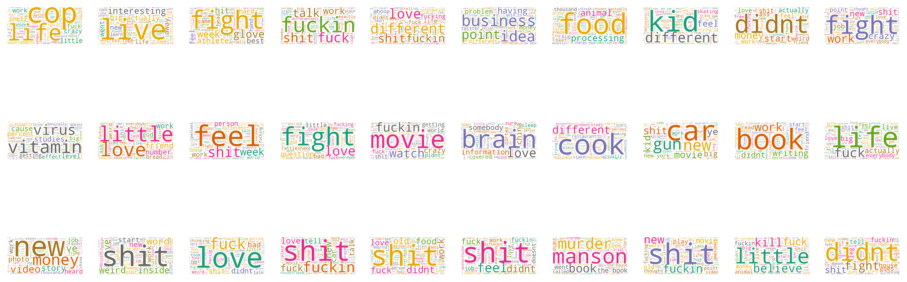

In [12]:
plt.rcParams['figure.figsize'] = [16, 6]

for index, podcast in enumerate(data.columns):
    wc.generate(df.text[podcast])
    
    plt.subplot(3, 10, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
plt.show()

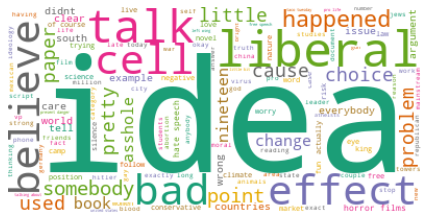

In [13]:
#let's try to see the result for the overall set of podcast
plt.rcParams['figure.figsize'] = [88, 34]

wc.generate(df.text[podcast])
    
plt.subplot(3, 10, index)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
    
plt.show()

Let's try and target the world clouds from super guest. As we've seen, it is a strategic pool of guest for the podcast. Maybe we can retrieve meaningful information by analyzing their transcript

In [14]:
unique_list = []
for podcast in df.columns:
    uniques = df[podcast].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(df['guest'], unique_list)), columns=['text', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,text,unique_words
0,Reggie Watts,994
1,Jesus Trejo,994
2,Jordan Jonas,994
3,wittman/JRE MMA Show with Justin Gaethje &amp...,994


In [15]:
df.shape

(994, 4)

In [16]:
guest=pd.read_csv('jredataeda.csv')
guest.drop(columns=['Unnamed: 0', 'date', 'duration', 'year','total','One Time Participant','Regular Invitee','Super Guest', 'timestamp'], inplace=True)
guest.rename(columns={"Attendees type":"Attendees_types"}, inplace=True)
superguest=guest[guest.Attendees_types.eq('Super Guest')]
superguest.drop_duplicates()

,guest,counts,Attendees_types
26,Tom Papa,12,Super Guest
41,schaub/JRE MMA Show with Brendan Schaub,12,Super Guest
53,Tony Hinchcliffe,10,Super Guest
73,Duncan Trussell,19,Super Guest
121,Greg Fitzsimmons,17,Super Guest
139,Brian Redban,34,Super Guest
173,Bryan Callen,21,Super Guest
194,Joey Diaz,14,Super Guest
208,Tom Segura,12,Super Guest
220,Bert Kreischer,11,Super Guest


In [17]:
listofguest=[' Tom Papa', 'Tom Papa',' schaub/JRE MMA Show with Brendan Schaub',' Tony Hinchcliffe',' Duncan Trussell',
             ' Greg Fitzsimmons',' Brian Redban',' Bryan Callen',' Joey Diaz',' Tom Segura',' Bert Kreischer',
             ' Ari Shaffir',' Ari Shaffir, Brian Redban',' Joey Diaz, Brian Redban',' Bryan Callen, Brian Redban',
             ' Duncan Trussell, Brian Redban']
dflistofguest = pd.DataFrame(listofguest) 
dflistofguest=dflistofguest.astype('string')

In [18]:
df["guest"]=df["guest"].astype('string')

In [19]:
dfguest=df[df['guest'].isin(listofguest)]

In [20]:
dfguest.to_csv('dfguestdataeda.csv')

In [21]:
data_cv2 = cv.fit_transform(dfguest.text)
data_dtm2 = pd.DataFrame(data_cv2.toarray(), columns=cv.get_feature_names())
data_dtm2.index = dfguest.index
data2 = data_dtm2.transpose()

ValueError: num must be 1 <= num <= 112, not 113

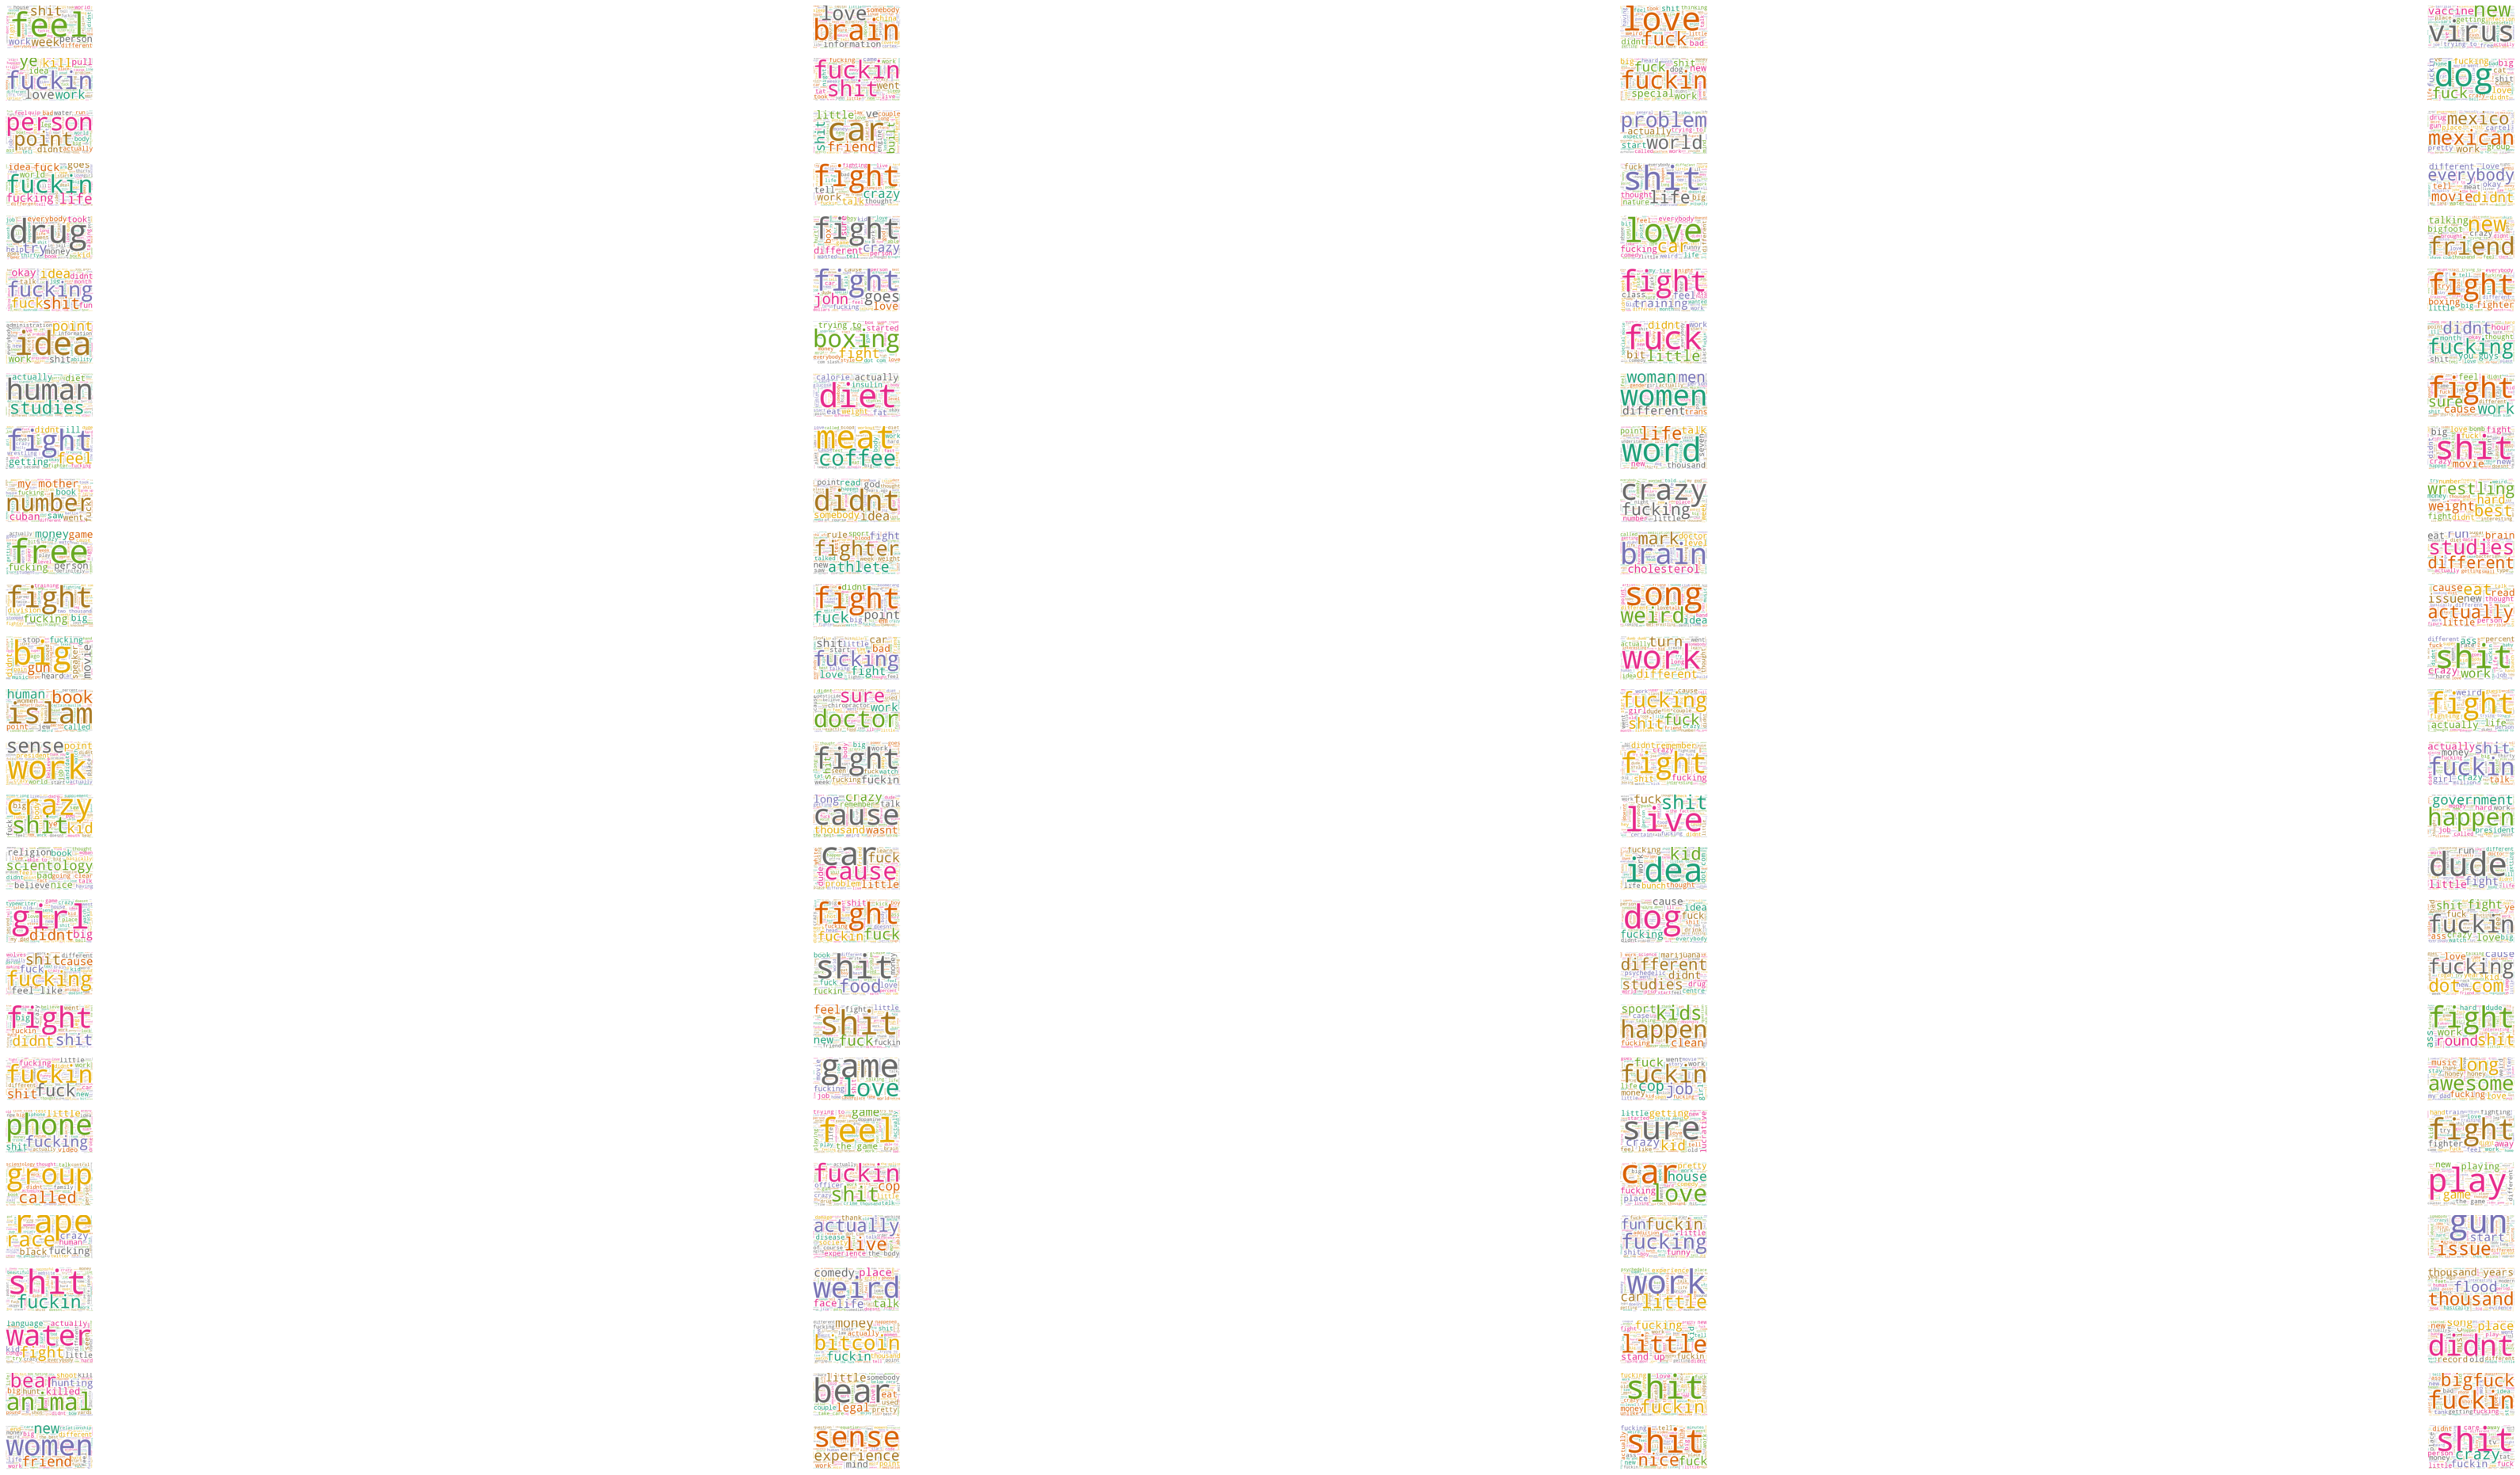

In [22]:
plt.rcParams['figure.figsize'] = [70, 34]

for index, podcast in enumerate(data2.columns):
    wc.generate(dfguest.text[podcast])
    
    plt.subplot(28,4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
plt.show()

Lots of results but it enables us to appreciate the great diversity of topic, and great profusion of profanity...

In [23]:
ps=PorterStemmer()

In [24]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

dfguest['text_stemmed'] = dfguest['text'].apply(stem_sentences)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: num must be 1 <= num <= 112, not 113

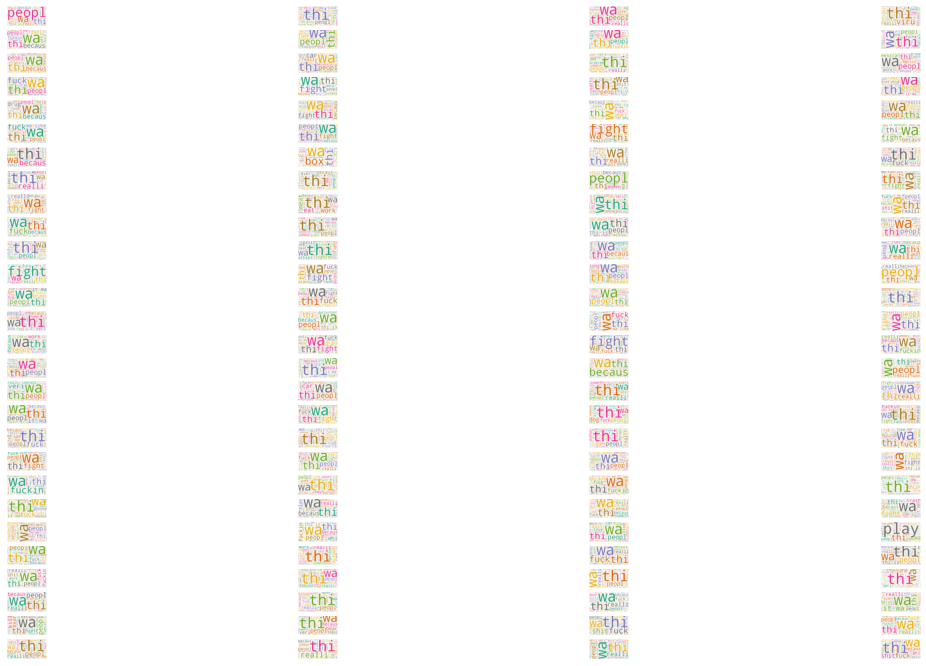

In [25]:
plt.rcParams['figure.figsize'] = [20, 12]

for index, podcast in enumerate(data2.columns):
    wc.generate(dfguest.text_stemmed[podcast])
    
    plt.subplot(28,4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
plt.show()

Going for a stemming strategy of cleaning the words do not yield satisfactory results. Let's forget about that.

### IV. Wikipedia

Let's use the wikipedia API to get some info on the guest! we can then sort the result and see what the guest are doing. Let's repeat the process for all the guests and for the super guests

In [26]:
b=[]

for name in dfguest['guest']:
    try:
        a=wikipedia.summary(name)
        c=str.split(a) 
        d=(' '.join(c[:20]))
        b.append(d)
    except:
        pass
    
b

['Thomas Papa Jr. (born November 10, 1968) is an American stand-up comedian and radio host. He hosts the Sirius XM',
 'Tony Hinchcliffe (born June 8, 1984) is an American comedian and writer. He has been on the writing staff of',
 'Charles Duncan Trussell (born April 20, 1974) is an American actor, voice actor and stand-up comic, known for his podcast',
 'Gregory Sebastian "Greg" Fitzsimmons (born April 5, 1966) is an American stand-up comedian, writer, producer and radio host. He hosted',
 'José Antonio "Coco" Díaz (born February 19, 1963) is a Cuban-American comedian, actor, and podcast host. He had roles in',
 "Tom Segura (born April 16, 1979) is an American stand-up comedian, writer, actor, and podcaster. Segura co-hosts Your Mom's House",
 'Bert Kreischer (born November 3, 1972) is an American stand-up comedian, reality television host and actor. In 1997 he was',
 'Charles Duncan Trussell (born April 20, 1974) is an American actor, voice actor and stand-up comic, known for his pod

In [27]:
dfwiki=pd.DataFrame(b)
dfwiki.drop_duplicates(inplace=True)
dfwiki.columns = ["wiki"]
dfwiki

,wiki
0,"Thomas Papa Jr. (born November 10, 1968) is an..."
1,"Tony Hinchcliffe (born June 8, 1984) is an Ame..."
2,"Charles Duncan Trussell (born April 20, 1974) ..."
3,"Gregory Sebastian ""Greg"" Fitzsimmons (born Apr..."
4,"José Antonio ""Coco"" Díaz (born February 19, 19..."
5,"Tom Segura (born April 16, 1979) is an America..."
6,"Bert Kreischer (born November 3, 1972) is an A..."
11,"Ari David Shaffir (born February 12, 1974) is ..."


In [28]:
b2=[]

for name in dfguest['guest']:
    try:
        a=wikipedia.summary(name)
        c=str.split(a) 
        d=(' '.join(c[8:20]))
        b2.append(d)
    except:
        pass
    
b2

['an American stand-up comedian and radio host. He hosts the Sirius XM',
 'American comedian and writer. He has been on the writing staff of',
 'an American actor, voice actor and stand-up comic, known for his podcast',
 'is an American stand-up comedian, writer, producer and radio host. He hosted',
 'is a Cuban-American comedian, actor, and podcast host. He had roles in',
 "American stand-up comedian, writer, actor, and podcaster. Segura co-hosts Your Mom's House",
 'American stand-up comedian, reality television host and actor. In 1997 he was',
 'an American actor, voice actor and stand-up comic, known for his podcast',
 'an American stand-up comedian and radio host. He hosts the Sirius XM',
 'is a Cuban-American comedian, actor, and podcast host. He had roles in',
 'American comedian and writer. He has been on the writing staff of',
 'an American comedian, actor, podcaster, writer, and producer. He produces and hosts',
 'is an American stand-up comedian, writer, producer and radio h

In [29]:
dfwiki2=pd.DataFrame(b2)
dfwiki2.drop_duplicates(inplace=True)
dfwiki2.columns = ['wiki']

In [30]:
cv3 = CountVectorizer(stop_words='english')
data_cv3 = cv3.fit_transform(dfwiki2.wiki)
data_dtm3 = pd.DataFrame(data_cv3.toarray(), columns=cv3.get_feature_names())
data_dtm3.index = dfwiki2.index

data3 = data_dtm3.transpose()
data3.head()

,0,1,2,3,4,5,6,11
1997,0,0,0,0,0,0,1,0
actor,0,0,2,0,1,1,1,1
american,1,1,1,1,1,1,1,1
comedian,1,1,0,1,1,1,1,1
comic,0,0,1,0,0,0,0,0


In [31]:
data3['total']=data3.sum(axis=1)

In [32]:
data3['total'].sort_values(ascending=False)

american      8
comedian      7
actor         6
stand         5
writer        4
host          4
hosts         3
podcaster     2
radio         2
producer      2
podcast       2
known         1
comic         1
cuban         1
hosted        1
house         1
xm            1
mom           1
writing       1
produces      1
reality       1
roles         1
segura        1
sirius        1
staff         1
television    1
voice         1
1997          1
Name: total, dtype: int64

So the super guest are mainly america, actor, comedian or standuper. Which can be surprising as the topics of conversation can be widely diverse.

Let's repeat for all the guest

In [33]:
e=[]

for name in df['guest']:
    try:
        a=wikipedia.summary(name)
        c=str.split(a) 
        d=(' '.join(c[8:20]))
        e.append(d)
    except:
        pass
    
e

C:\Users\benja\anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\benja\anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


['1972) is an American comedian, actor, beatboxer and musician. His improvised musical',
 'and video podcast hosted by Canadian stand-up comedian, writer, and actor Norm',
 'an American stand-up comedian, actor, and producer. Born and raised in Philadelphia,',
 "an American farmer, lecturer, and author whose books include Folks, This Ain't",
 'is an American professional skateboarder, actor, stuntman, and the owner of the',
 'an American stand-up comedian, actor, voice actor, and writer. On television, he',
 'an American stand-up comedian and radio host. He hosts the Sirius XM',
 'and television host who co-hosted The Insider on CBS, and currently hosts',
 'American comedian and writer. He has been on the writing staff of',
 'California) is an American director, writer and actor.',
 'an American comedian and actor known for winning the grand prize in',
 'American stand-up comedian and television personality. She is best known for being',
 'an American journalist, YouTuber, and politica

In [34]:
dfwikiall=pd.DataFrame(e)
dfwikiall.drop_duplicates(inplace=True)
dfwikiall.columns = ['wiki']

In [35]:
cv4 = CountVectorizer(stop_words='english')
data_cv4 = cv4.fit_transform(dfwikiall.wiki)
data_dtm4 = pd.DataFrame(data_cv4.toarray(), columns=cv4.get_feature_names())
data_dtm4.index = dfwikiall.index

data4 = data_dtm4.transpose()
data4.head()

,0,1,2,3,4,5,6,7,8,9,...,733,734,736,737,739,743,744,745,747,748
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data4['total']=data4.sum(axis=1)
data4['total'].sort_values(ascending=False).head(60)

american          278
actor             107
comedian          100
known              81
writer             70
stand              56
author             53
host               42
television         40
producer           39
best               36
professional       34
musician           28
artist             26
political          25
personality        25
martial            24
mixed              22
journalist         20
songwriter         20
podcaster          20
radio              20
singer             20
born               20
commentator        19
director           19
canadian           19
podcast            17
english            15
activist           15
retired            14
entrepreneur       14
new                14
founder            13
filmmaker          13
university         12
actress            11
currently          11
film               11
british            11
based              11
record             10
york               10
professor          10
stage               9
comic     

The trend for superguests sample is actually confirmed with the whole population: mainly artsy / culture professionals, a few political personnalities and journalists, as well as a minority of entrepreneurs and professors.